# Chapter 14
## Exercises

9. Build your own CNN from Scratch and try  to achieve the highest accuracy on MNIST

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=10000)

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0


In [4]:
len(set(y_train))

10

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,3,input_shape=(28,28,1), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, 3,activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128, 3,activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(256, 1,activation='relu'))
model.add(keras.layers.MaxPool2D((1,1)))
model.add(keras.layers.Conv2D(256, 1,activation='relu'))
model.add(keras.layers.MaxPool2D((1,1)))
model.add(keras.layers.Conv2D(128, 1,activation='relu'))
model.add(keras.layers.MaxPool2D((1,1)))
model.add(keras.layers.Conv2D(64, 1,activation='relu'))
model.add(keras.layers.MaxPool2D((1,1)))
model.add(keras.layers.Conv2D(32, 1,activation='relu'))
model.add(keras.layers.MaxPool2D((1,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(10,activation='softmax'))


In [6]:
from tensorflow.keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

In [7]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [8]:
import numpy as np
x_train = np.expand_dims(x_train, axis = -1)
x_val = np.expand_dims(x_val, axis = -1)

In [9]:
model.fit(x_train, y_train,
          epochs=2, validation_data=(x_val,y_val))

Epoch 1/2
1563/1563 [==============================] - 48s 10ms/step - loss: 0.7863 - acc: 0.7306 - val_loss: 0.2410 - val_acc: 0.9452
Epoch 2/2
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3074 - acc: 0.9440 - val_loss: 0.1803 - val_acc: 0.9630


In [10]:
y_hat = model.predict(np.expand_dims(x_test, axis=-1))

In [11]:
np.argmax(y_hat[980])

2

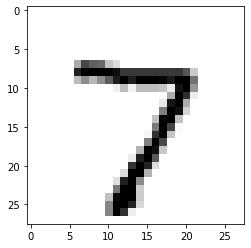

7


KeyboardInterrupt: ignored

In [12]:
#import matplotlib.pyplot as plt
f#or i in range(len(x_test)):
 #   plt.imshow(x_test[i],cmap='binary')
  #  plt.show()
   # print(np.argmax(y_hat[i]))
    #input()

In [13]:
#y_hat = to_categorical(y_hat, num_classes)

In [14]:
from sklearn.metrics import accuracy_score
y_test_1 = [np.argmax(i) for i in y_test ]
y_hat_1 = [np.argmax(i) for i in y_hat ] 
acc = accuracy_score(y_test_1,y_hat_1)
acc

0.9656

10. Use transfer learning for large image classification, going through these steps:
- Create a training set containing at least 100 images per class.(tensorflow datasets)
- split it into a training set, a validation set, and test set.
- build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation.
- fine-tune a pretrained model on this dataset

In [15]:
!pip install tensorflow-datasets

In [16]:
import tensorflow_datasets as tfds

ds, info = tfds.load('caltech_birds2011',  as_supervised = True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2011/0.1.1.incompleteQ77N42/caltech_birds2011-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2011/0.1.1.incompleteQ77N42/caltech_birds2011-test.tfrecord


Dataset caltech_birds2011 downloaded and prepared to /root/tensorflow_datasets/caltech_birds2011/0.1.1. Subsequent calls will reuse this data.


In [17]:
ds_size = info.splits["train"].num_examples
class_name = info.features["label"].names
n_classes = info.features["label"].num_classes

In [18]:
n_classes

200

In [22]:
(train_split, test_split, valid_split), info = tfds.load('caltech_birds2011',
                                                     split=["train[:80%]","train[80%:90%]","train[90%:]"],
                                                     data_dir="./dataset",
                                                     as_supervised=True,
                                                     with_info=True)

In [31]:
import tensorflow as tf
def preprocess(image,label):
    resized_image = tf.image.resize(image, [224,224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image,label


In [32]:
batch_size = 32
train_set = train_split.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_split.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_split.map(preprocess).batch(batch_size).prefetch(1)

In [33]:
base_model = keras.applications.xception.Xception(weights='imagenet',
                                                  include_top=False)
max_p = keras.layers.GlobalMaxPooling2D()(base_model.output)
output = keras.layers.Dense(n_classes,activation='softmax')(max_p)
model = keras.Model(inputs=base_model.input, outputs = output)

In [34]:
for layer in base_model.layers:
    layer.trainable = False

In [35]:
train_set

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [36]:
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])


Epoch 1/5
150/150 [==============================] - 29s 154ms/step - loss: 165.0092 - accuracy: 0.1641 - val_loss: 84.9550 - val_accuracy: 0.2571
Epoch 2/5
150/150 [==============================] - 23s 140ms/step - loss: 36.0757 - accuracy: 0.4818 - val_loss: 34.9095 - val_accuracy: 0.3990
Epoch 3/5
150/150 [==============================] - 23s 141ms/step - loss: 13.2341 - accuracy: 0.6444 - val_loss: 26.5921 - val_accuracy: 0.4290
Epoch 4/5
150/150 [==============================] - 23s 140ms/step - loss: 6.4874 - accuracy: 0.7466 - val_loss: 22.0599 - val_accuracy: 0.4257
Epoch 5/5
150/150 [==============================] - 23s 143ms/step - loss: 3.7692 - accuracy: 0.8075 - val_loss: 20.8242 - val_accuracy: 0.4658


In [37]:
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
150/150 [==============================] - 23s 142ms/step - loss: 2.5760 - accuracy: 0.8571 - val_loss: 19.3474 - val_accuracy: 0.4608
Epoch 2/5
150/150 [==============================] - 24s 145ms/step - loss: 1.5926 - accuracy: 0.8930 - val_loss: 18.2402 - val_accuracy: 0.4758
Epoch 3/5
150/150 [==============================] - 25s 155ms/step - loss: 1.2008 - accuracy: 0.9191 - val_loss: 17.7442 - val_accuracy: 0.4925
Epoch 4/5
150/150 [==============================] - 25s 152ms/step - loss: 0.9283 - accuracy: 0.9306 - val_loss: 17.4178 - val_accuracy: 0.5008
Epoch 5/5
150/150 [==============================] - 25s 153ms/step - loss: 0.6521 - accuracy: 0.9452 - val_loss: 17.0770 - val_accuracy: 0.5042
